# Table of Contents

01 Importing Libraries <br />
02 Importing Data <br />
03 Creating Charts 
- Histogram: Order Hour of Day
- Bar Chart: Loyalty Flag
- Line Chart: Prices vs Hour of Day
- Line Chart Age vs Dependants
- Scatterplot: Age vs Income


# 01 Importing Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing Data

In [2]:
# Create basic path
path = r'C:\Users\Rajit\Python\11-2023 Instacart Basket Analysis'

In [3]:
# Importing customers_orders_merged_49 dataset
df_com = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_merged_49.pkl'))

# 03 Creating Charts

In [5]:
df_com.head()

,user_id,Gender,State,Age,date_joined,dependants,fam_status,income,product_id,product_name,...,price_range,Store_Actvitiy,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_order_frequency,frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Busiest Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regular Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Busiest Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regular Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Slowest Days,Most_Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both


In [6]:
list(df_com.columns.values)

['user_id',
 'Gender',
 'State',
 'Age',
 'date_joined',
 'dependants',
 'fam_status',
 'income',
 'product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'price_range',
 'Store_Actvitiy',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'avg_spent',
 'spending_flag',
 'median_order_frequency',
 'frequency_flag',
 '_merge']

## Histogram: Order hour of Day

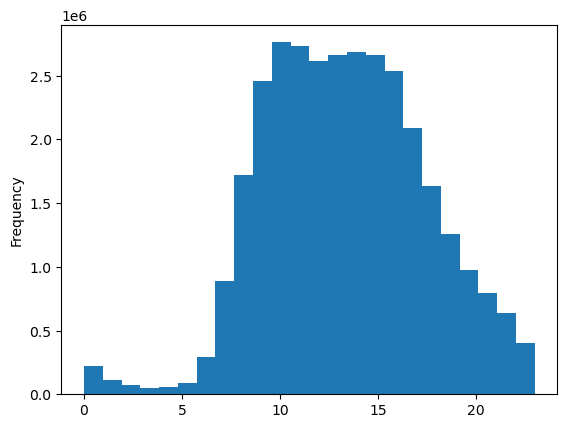

In [7]:
#Create Histogram for order_hour_of_day
hist = df_com['order_hour_of_day'].plot.hist(bins = 24)

### Histogram Analysis
From the Histogram we can see how orders decrese slightly from hour 0 -> 4, but then pick up very quickly from hour 5 peaking at hour 10. We maintain this frequency till around hour 16 where orders start to slow back down

In [18]:
# Saves hist image in a png 
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [8]:
df_com['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: count, dtype: int64

## Bar Chart: Loyalty Flag

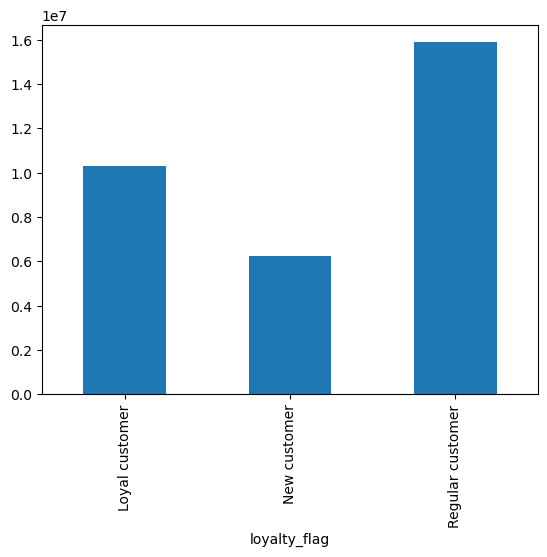

In [9]:
# Plot a bar chart of customer loyalty
bar = df_com['loyalty_flag'].value_counts().sort_index().plot.bar()

In [17]:
# Saves bar image in a png 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

## Line Chart: Prices vs Hour of Day

### Sampling Data

In [4]:
# Create a random list of numbers the same length of the com dataframe

dev = np.random.rand(len(df_com)) <= .7

In [5]:
# Split Sample into two samples

#Stores 70% of the sample in big dataframe
big = df_com[dev]

#Stores 30% of the sample in the samll dataframe
small = df_com[~dev]

In [1]:
# checking length of dataframe
len(df_com)

NameError: name 'df_com' is not defined

In [13]:
# Verifying lengths match up
len(big) + len(small)

32404859

### Reducing columns to relevant data for line chart 

In [14]:
df_com_2 = small[['order_hour_of_day','prices']]

A:\Applications\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Applications\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Applications\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
A:\Applications\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

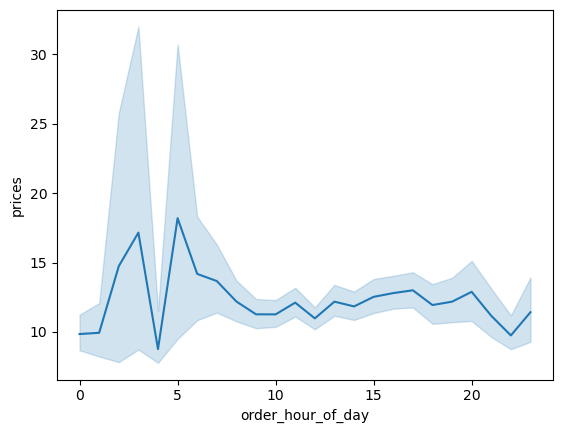

In [15]:
line = sns.lineplot(data = df_com_2, x = 'order_hour_of_day', y = 'prices')

From the line chart we can see prices spiking early, but decreasing and reamining steady for the remainder of the day after hour 5 

In [16]:
# Saves line image in a png 
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_by_hour_of_day.png'))

## Line Chart: Age vs Dependants

In [6]:
# Reduce Sample with relevant columns 
df_com_3 = small[['Age','dependants']]

A:\Applications\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Applications\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Applications\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
A:\Applications\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

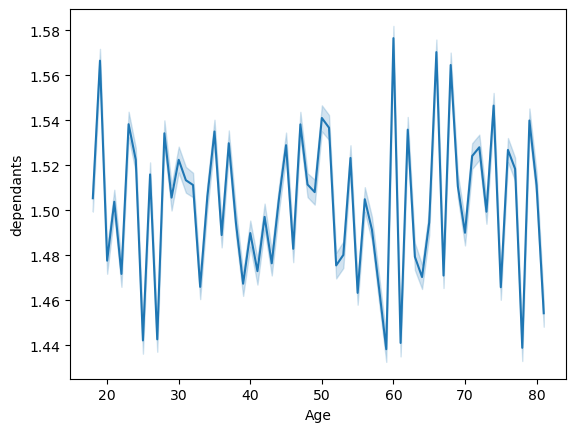

In [7]:
# Create a line chart for relationship between age and number of dependants
line_avd = sns.lineplot(data = df_com_3, x = 'Age', y = 'dependants')

### Line Chart Analysis
From the line chart we can see there's no real correlation between age and number of dependants. Note the small scale. 

In [8]:
#Exporting Linechart as png
line_avd.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_vs_dependants.png'))

## Scatterplot: Age vs Income

In [9]:
# Get Sample with only Age and Income columns 
df_com_4 = small[['Age','income']]

A:\Applications\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Applications\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


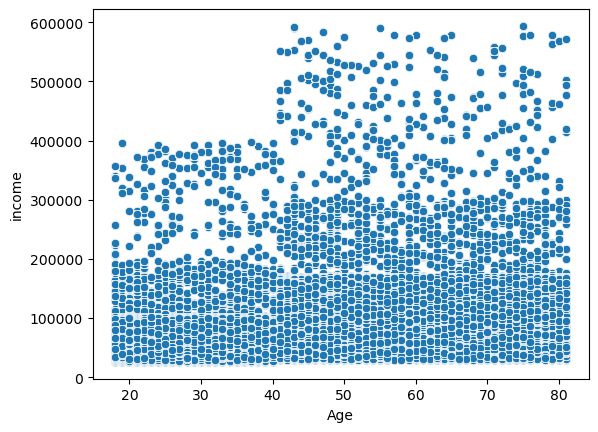

In [10]:
# Create a scatterplot chart for relationship between age and income
scplot = sns.scatterplot(data = df_com_4, x = 'Age', y = 'income')

## Scatterplot Analysis
It's a bit difficutl to tell with the amount of dots on the chart, but there might be a slightly positive correlation as we see more dots with higher incomes when age reaches 45+. It doesn't really increase significantly, but levels off around 600,000

In [11]:
#Export Scatterplot as png
scplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scplot_age_vs_income.png'))